X_new 는 :
 [[-1.72161036e+00 -1.48033142e+00  2.19138111e+00]
 [-3.65733840e+00 -9.54823830e+00  9.11688546e+01]
 [ 7.07781630e+00  9.95087718e-01  9.90199567e-01]
 [-1.36579859e+00 -3.14862498e-01  9.91383928e-02]
 [-2.66521206e+00 -3.12591651e+00  9.77135405e+00]
 [ 7.63027116e+00  8.69797933e+00  7.56548444e+01]
 [-5.27144331e+00 -1.21188070e+01  1.46865483e+02]
 [ 7.91767139e+00  1.41547387e+00  2.00356628e+00]
 [-1.41284184e+00  1.12963480e-01  1.27607478e-02]
 [-1.01519039e+00 -1.03318203e+00  1.06746511e+00]
 [ 8.26341570e+00  1.03472344e+01  1.07065259e+02]
 [ 6.96767867e+00  8.96225230e+00  8.03219662e+01]
 [-8.47792492e-01 -2.12185612e+00  4.50227339e+00]
 [ 7.48006237e+00  2.49392925e+00  6.21968311e+00]
 [ 7.71454967e+00  1.84207010e+00  3.39322225e+00]
 [-7.74064658e+00 -8.61800744e+00  7.42700522e+01]
 [-5.41087235e+00 -8.71941280e+00  7.60281596e+01]
 [-2.27579204e+00 -2.89699926e+00  8.39260472e+00]
 [-1.25668449e+00 -2.33416219e+00  5.44831313e+00]
 [ 7.61227907e+00  9

Text(0.5,0,'특성1 ** 2')

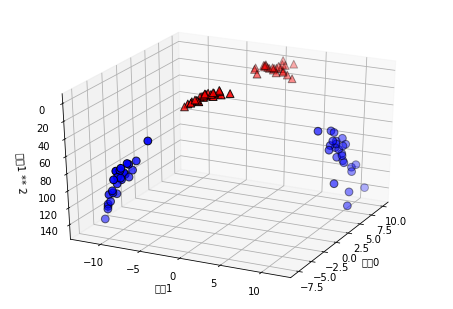

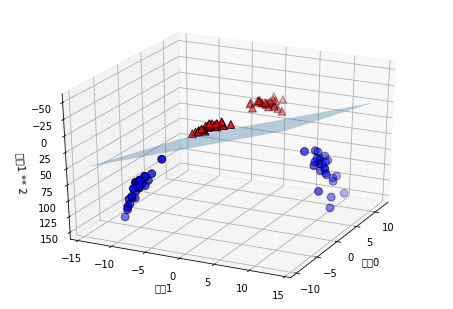

In [6]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mglearn.plot_helpers import cm2

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)

'''
mglearn.plots.plot_2d_separator(linear_svm, X)

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
'''

# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

print("X_new 는 :\n {}".format(X_new))


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")